## Dataset Iris 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets

In [2]:
iris = datasets.load_iris()
X = iris.data[:, :2]  # apenas as 2 primeiras features
Y = iris.target

In [3]:
logreg = linear_model.LogisticRegression(C=1e5)
logreg.fit(X, Y)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [4]:
# Plot do limiar de decisão
h = .02
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

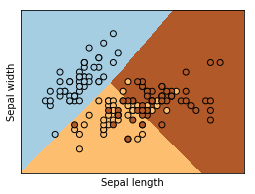

In [5]:
# Coloca o resultado em um plot colorido
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot dos pontos de treinamento
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X = iris.data[:, :2]  # apenas as 2 primeiras features
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
logreg = linear_model.LogisticRegression(C=1e5)
y_pred = logreg.fit(X_train, y_train).predict(X_test)

print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      0.94      0.97        17
          1       0.71      0.77      0.74        13
          2       0.80      0.80      0.80        15

avg / total       0.85      0.84      0.85        45



In [7]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

#y_pred = OneVsRestClassifier(LinearSVC(random_state=0)).fit(X_train, y_train).predict(X_test)
y_pred = LinearSVC(random_state=0).fit(X_train, y_train).predict(X_test)

print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.94      0.94      0.94        17
          1       0.67      0.62      0.64        13
          2       0.75      0.80      0.77        15

avg / total       0.80      0.80      0.80        45



## Críticas de filmes

O dataset é formado por frases separadas por tab do dataset Rotten Tomatoes. Um parser de Stanford foi executado sobre cada sentença, assim cada frase tem um PhaseId e cada sentença tem um SentenceID. O arquivo train.tsv contém um label de sentimento para cada frase, como:

- 0 - negativo
- 1 - pouco negativo
- 2 - neutro
- 3 - pouco positivo
- 4 - positivo

Fonte: https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews/data

In [8]:
# Leitura dos dados
import numpy as np
import pandas as pd
df = pd.read_csv('movie-reviews/train.tsv', header=0, delimiter='\t')
print(df.count())

PhraseId      156060
SentenceId    156060
Phrase        156060
Sentiment     156060
dtype: int64


In [9]:
df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [10]:
df['Sentiment'].describe()

count    156060.000000
mean          2.063578
std           0.893832
min           0.000000
25%           2.000000
50%           2.000000
75%           3.000000
max           4.000000
Name: Sentiment, dtype: float64

In [11]:
df['Sentiment'].value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

In [12]:
df['Sentiment'].value_counts()/df['Sentiment'].count()

2    0.509945
3    0.210989
1    0.174760
4    0.058990
0    0.045316
Name: Sentiment, dtype: float64

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
import itertools

In [14]:
# Valores de C que iremos verificar
trials = [{'C': 0.01},
          {'C': 0.1},
          {'C': 1},
          {'C': 10},
          {'C': 100}]

In [15]:
# Divisão em treino e teste
X, y = df['Phrase'], df['Sentiment'].as_matrix()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [16]:
# Vetorizador TF-IDF transforma os objetos de texto em features numéricas
vect = TfidfVectorizer(stop_words='english', use_idf=False, max_df=0.25)
X_new_train = vect.fit_transform(X_train)
X_new_test = vect.transform(X_test)

In [17]:
# Treina e testa cada um dos valores para o parâmetro C
scores = []
for params in trials:
    clf = LogisticRegression(**params)
    clf.fit(X_new_train, y_train)
    y_pred = clf.predict(X_new_test)
    score = accuracy_score(y_test, y_pred)
    scores.append(score)

In [18]:
best_idx = np.argmax(scores)
print('Melhor acurácia: ', scores[best_idx])
print('Melhor parâmetro: ', trials[best_idx])

Melhor acurácia:  0.6352898457858088
Melhor parâmetro:  {'C': 10}


In [19]:
clf = LogisticRegression(C=10)
y_pred = clf.fit(X_new_train, y_train).predict(X_new_test)

In [20]:
print('Acurácia:', accuracy_score(y_test, y_pred))
print('\nMatriz de confunsão: \n', confusion_matrix(y_test, y_pred))
print('\n', classification_report(y_test, y_pred))

Acurácia: 0.6352898457858088

Matriz de confunsão: 
 [[  583  1033   394    68     4]
 [  429  3399  3832   431    24]
 [  103  1789 20055  1875    93]
 [   13   298  4327  4819   592]
 [    2    43   332  1393   887]]

              precision    recall  f1-score   support

          0       0.52      0.28      0.36      2082
          1       0.52      0.42      0.46      8115
          2       0.69      0.84      0.76     23915
          3       0.56      0.48      0.52     10049
          4       0.55      0.33      0.42      2657

avg / total       0.62      0.64      0.62     46818



In [21]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Matriz de Confusão',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Verdadeiro')
    plt.xlabel('Predito')

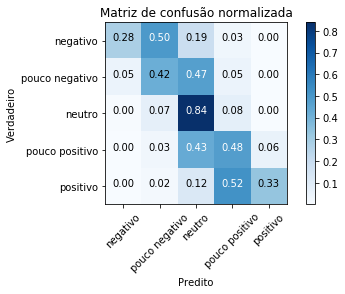

In [22]:
class_names = ['negativo', 'pouco negativo', 'neutro', 'pouco positivo', 'positivo']
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, class_names, normalize=True,
                      title='Matriz de confusão normalizada')